In [1]:
import glob
from pyteomics import mzid
import numpy as np
import matplotlib.pyplot as plt
import os
from venn import venn
import numpy 
import collections
import pandas as pd

import seaborn as sns
import math

In [4]:
prolist=[
"01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2",
"01650b_BF7-TUM_first_pool_96_01_01-3xHCD-1h-R2",
"01650b_BG1-TUM_first_pool_49_01_01-3xHCD-1h-R2",
"01650b_BG2-TUM_first_pool_57_01_01-3xHCD-1h-R2",
"01650b_BA4-TUM_first_pool_67_01_01-3xHCD-1h-R2",
"01650b_BA3-TUM_first_pool_59_01_01-3xHCD-1h-R2",
"01650b_BB4-TUM_first_pool_68_01_01-3xHCD-1h-R2",
"01650b_BF3-TUM_first_pool_64_01_01-3xHCD-1h-R2",
"01650b_BA6-TUM_first_pool_83_01_01-3xHCD-1h-R2",
"01650b_BA1-TUM_first_pool_43_01_01-3xHCD-1h-R2"
]
#生成每个pro对应的两种算法和四种方法的文件路径   Generate file paths for the two algorithms and four methods corresponding to each pro
maras=[];prides=[];mara=[];pride=[];original=[];total=[];totals=[];
basePath = "C:/Users/xiyang/Desktop/OMEGA/data/v1/"
methods=["best","most","bin","average"]
consensus=["MaRaClusterConsensus","Spectra-clusterConsensus"]
for prolistindex in range(0,len(prolist)):
    temporiginal = os.environ.get('MZID_FILE', basePath+prolist[prolistindex]+'/identifaction_origin/'+prolist[prolistindex]+'-features-index-percolator-fdr-filter.mzid')
    original=[temporiginal]
    tempmarabest =os.environ.get('MZID_FILE', basePath+prolist[prolistindex]+'/consensus_output/maracluster/mgf/best1/p10/'+prolist[prolistindex]+'_'+consensus[0]+'-'+methods[0]+'-features-index-percolator-fdr-filter.mzid')
    tempmaramost =os.environ.get('MZID_FILE', basePath+prolist[prolistindex]+'/consensus_output/maracluster/mgf/'+methods[1]+'/p10/'+prolist[prolistindex]+'_'+consensus[0]+'-'+methods[1]+'-features-index-percolator-fdr-filter.mzid')
    tempmarabin =os.environ.get('MZID_FILE', basePath+prolist[prolistindex]+'/consensus_output/maracluster/mgf/'+methods[2]+'/p10/'+prolist[prolistindex]+'_'+consensus[0]+'-'+methods[2]+'-features-index-percolator-fdr-filter.mzid')
    tempmaraaverage =os.environ.get('MZID_FILE', basePath+prolist[prolistindex]+'/consensus_output/maracluster/mgf/'+methods[3]+'/p10/'+prolist[prolistindex]+'_'+consensus[0]+'-'+methods[3]+'-features-index-percolator-fdr-filter.mzid')
    mara=[tempmarabest,tempmaramost,tempmarabin,tempmaraaverage]
    
    temppridebest =os.environ.get('MZID_FILE', basePath+prolist[prolistindex]+'/consensus_output/spectracluster/mgf/best1/'+prolist[prolistindex]+'_'+consensus[1]+'-'+methods[0]+'-features-index-percolator-fdr-filter.mzid')
    temppridemost =os.environ.get('MZID_FILE', basePath+prolist[prolistindex]+'/consensus_output/spectracluster/mgf/'+methods[1]+'/'+prolist[prolistindex]+'_'+consensus[1]+'-'+methods[1]+'-features-index-percolator-fdr-filter.mzid')
    temppridebin =os.environ.get('MZID_FILE', basePath+prolist[prolistindex]+'/consensus_output/spectracluster/mgf/'+methods[2]+'/'+prolist[prolistindex]+'_'+consensus[1]+'-'+methods[2]+'-features-index-percolator-fdr-filter.mzid')
    tempprideaverage =os.environ.get('MZID_FILE', basePath+prolist[prolistindex]+'/consensus_output/spectracluster/mgf/'+methods[3]+'/'+prolist[prolistindex]+'_'+consensus[1]+'-'+methods[3]+'-features-index-percolator-fdr-filter.mzid')
    pride=[temppridebest,temppridemost,temppridebin,tempprideaverage]
    
    total=[temporiginal,tempmarabest,tempmaramost,tempmarabin,tempmaraaverage,temppridebest,temppridemost,temppridebin,tempprideaverage]
    totals.append(total)
    maras.append(mara)
    prides.append(pride)
print(totals[0:2],len(totals),len(totals[0]),len(totals[1]))

[['C:/Users/xiyang/Desktop/OMEGA/data/v1/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2/identifaction_origin/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2-features-index-percolator-fdr-filter.mzid', 'C:/Users/xiyang/Desktop/OMEGA/data/v1/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2/consensus_output/maracluster/mgf/best1/p10/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2_MaRaClusterConsensus-best-features-index-percolator-fdr-filter.mzid', 'C:/Users/xiyang/Desktop/OMEGA/data/v1/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2/consensus_output/maracluster/mgf/most/p10/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2_MaRaClusterConsensus-most-features-index-percolator-fdr-filter.mzid', 'C:/Users/xiyang/Desktop/OMEGA/data/v1/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2/consensus_output/maracluster/mgf/bin/p10/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2_MaRaClusterConsensus-bin-features-index-percolator-fdr-filter.mzid', 'C:/Users/xiyang/Desktop/OMEGA/data/v1/01650b_BA5-TUM_first_pool_7

In [5]:
#计算所有的方法对应的参数数据  Calculate the output data corresponding to all methods
def getpeptide(totals,prolist):
    totals1=totals
    for listindex in range(0,len(prolist)):
        print("==============================================================\n")
        for algorithmindex in range(0,len(totals1[listindex])):
            if algorithmindex == 0:
                print("===========Original "+prolist[listindex]+"===========\n")
            if algorithmindex == 1:
                print("===========MARAcluster "+prolist[listindex]+"===========\n")
            if algorithmindex == 5:
                print("===========PRIDE "+prolist[listindex]+"===========\n")
            mzid_file=totals1[listindex][algorithmindex]
            #print("mzid_file:",mzid_file)
            mzid_dfr = mzid.DataFrame(mzid_file)
            a=mzid_dfr['PeptideSequence'].value_counts()
            #print(a)
            realUniquePeptide=0
            for i in range(0,len(a)):
                if a[i]>1:
                    realUniquePeptide=realUniquePeptide+1
            #print(realUniquePeptide)
            # Print simple stats
            reported_values = (len(mzid_dfr.index), len(mzid_dfr['PeptideSequence'].unique()),realUniquePeptide,len(mzid_dfr['PeptideSequence'].unique())-realUniquePeptide,len(set(mzid_dfr['accession'].sum())))
            data = [reported_values]
            #print("\n project:",prolist[listindex])
            print(mzid_file)
            p = pd.DataFrame(data, columns=["# PSMs", "# Total Peptide Sequences",'# Unique Peptide sequences', '# Non-unique Peptide sequences', '# Proteins'])
            print(p,"\n***********************\n")
getpeptide(totals,prolist)


===========Original 01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2===========

C:/Users/xiyang/Desktop/OMEGA/data/v1/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2/identifaction_origin/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2-features-index-percolator-fdr-filter.mzid
   # PSMs  # Total Peptide Sequences  # Unique Peptide sequences  \
0   42592                       3689                        1647   

   # Non-unique Peptide sequences  # Proteins  
0                            2042         938   
***********************

===========MARAcluster 01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2===========

C:/Users/xiyang/Desktop/OMEGA/data/v1/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2/consensus_output/maracluster/mgf/best1/p10/01650b_BA5-TUM_first_pool_75_01_01-3xHCD-1h-R2_MaRaClusterConsensus-best-features-index-percolator-fdr-filter.mzid
   # PSMs  # Total Peptide Sequences  # Unique Peptide sequences  \
0    3988                       1366                         869   

   #

In [6]:

#将所有的数据读入 并返回  Read all the data in and return
def getmzids(prolist,totals):
    dataframeList=[]
    for listindex in range(0,len(prolist)):
        print("==============================================================\n")
        temp_mzid_dfr=[]
        s,s1,s2,s3,s4,s5,s6,s7,s8 = [],[],[],[],[],[],[],[],[]
        for algorithmindex in range(0,len(totals[listindex])):
            #加入每一个pro对应的9个mzid文件  Add 9 mzid files corresponding to each pro
            mzid_file=totals[listindex][algorithmindex]
            temp_mzid_dfr.append(mzid.DataFrame(mzid_file))

        #为每个pro种每一个mzid文件添加一列标识  Add a list of logos for each mzid file of each pro type
        for i in range(0,len(temp_mzid_dfr[0].index)):
            s.append("original_MS")
        for i1 in range(0,len(temp_mzid_dfr[1].index)):
            s1.append("maracluster-best")
        for i2 in range(0,len(temp_mzid_dfr[2].index)):
            s2.append("maracluster-most_similar")
        for i3 in range(0,len(temp_mzid_dfr[3].index)):
            s3.append("maracluster-bin")
        for i4 in range(0,len(temp_mzid_dfr[4].index)):
            s4.append("maracluster-average")
        for i5 in range(0,len(temp_mzid_dfr[5].index)):
            s5.append("pride-best")
        for i6 in range(0,len(temp_mzid_dfr[6].index)):
            s6.append("pride-most_similar")
        for i7 in range(0,len(temp_mzid_dfr[7].index)):
            s7.append("pride-bin")
        for i8 in range(0,len(temp_mzid_dfr[8].index)):
            s8.append("pride-average")
        ss=pd.Series(s)
        ss1=pd.Series(s1)
        ss2=pd.Series(s2)
        ss3=pd.Series(s3)
        ss4=pd.Series(s4)
        ss5=pd.Series(s5)
        ss6=pd.Series(s6)
        ss7=pd.Series(s7)
        ss8=pd.Series(s8)
        temp_mzid_dfr[0].insert(1,'methods',ss)
        temp_mzid_dfr[1].insert(1,'methods',ss1)
        temp_mzid_dfr[2].insert(1,'methods',ss2)
        temp_mzid_dfr[3].insert(1,'methods',ss3)
        temp_mzid_dfr[4].insert(1,'methods',ss4)
        temp_mzid_dfr[5].insert(1,'methods',ss5)
        temp_mzid_dfr[6].insert(1,'methods',ss6)
        temp_mzid_dfr[7].insert(1,'methods',ss7)
        temp_mzid_dfr[8].insert(1,'methods',ss8)
        #整个一个pro种九种方法作为一个整体  Nine methods as a whole
        '''
        第一段是原始文件的所有内容，第二段是mara-best的内容，以此类推
        '''
        mzid_dfr=pd.concat([temp_mzid_dfr[0],temp_mzid_dfr[1],temp_mzid_dfr[2]\
                            ,temp_mzid_dfr[3],temp_mzid_dfr[4],temp_mzid_dfr[5]\
                            ,temp_mzid_dfr[6],temp_mzid_dfr[7],temp_mzid_dfr[8]],axis=0,ignore_index=True)
        #将所有的整理好的pro放到一个列表中   Put all the organized pros into a list
        dataframeList.append(mzid_dfr)
        return dataframeList
dataframeLists = getmzids(prolist,totals)

<class 'list'> <class 'pandas.core.frame.DataFrame'>


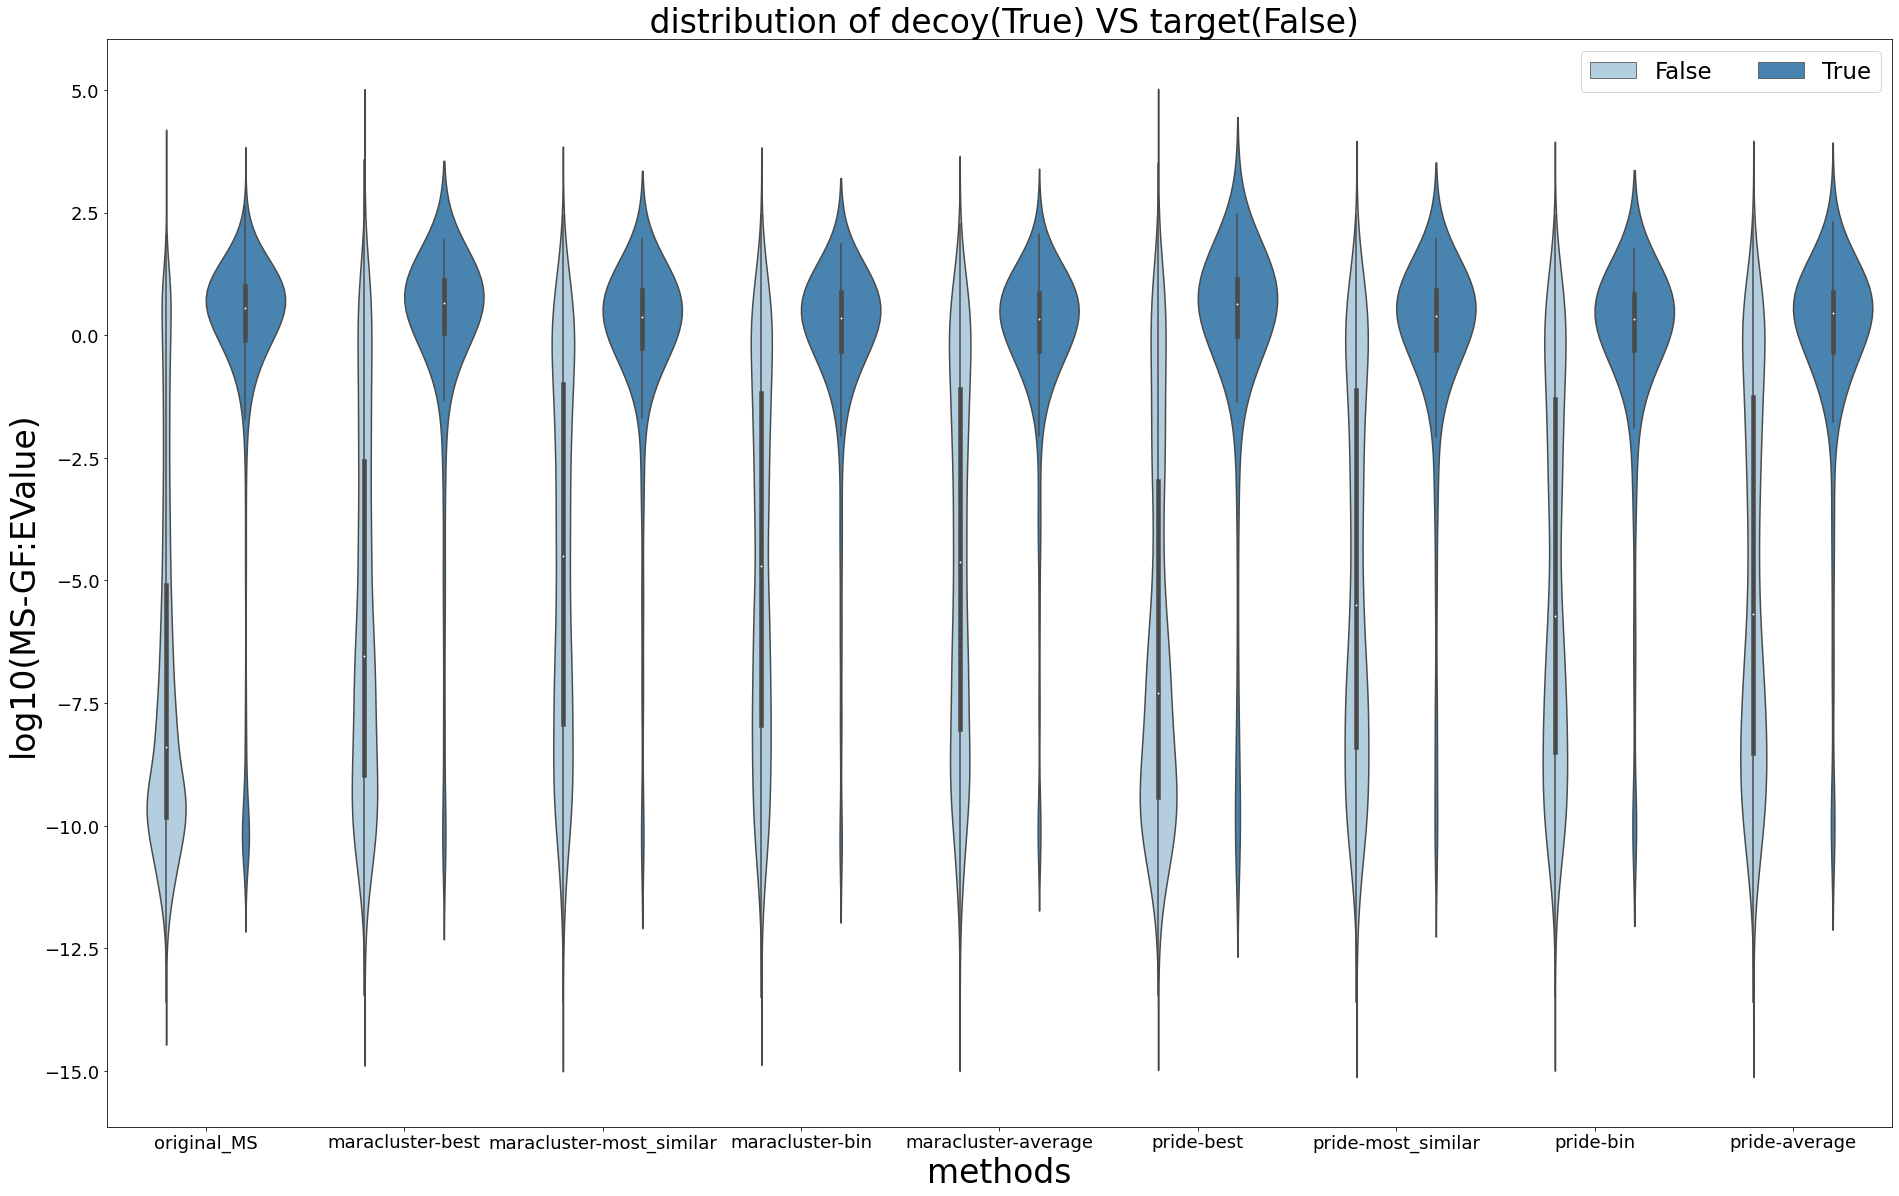

In [11]:
#绘制所有的方法到一张图上 Draw all the methods onto one picture
dataframeList = dataframeLists
print(type(dataframeList),type(dataframeList[0]))
mzid_dfr = pd.concat(dataframeList,axis=0,ignore_index=True)
#plt.style.use('ggplot')
mzid_dfr['MS-GF:EValue'] = mzid_dfr['MS-GF:EValue'].apply(lambda x:np.log10(x),[y for y in mzid_dfr['MS-GF:EValue']])
# 绘制分组小提琴图 Draw a grouped violin chart
plt.figure(figsize=(32, 20))
plt.subplot(1, 1, 1)
font1 = {
    'weight' : 'normal',
    'size'   : 33,
}
#style   https://blog.csdn.net/ICERON/article/details/85088582?utm_medium=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromMachineLearnPai2-1.control&dist_request_id=&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromMachineLearnPai2-1.control
#sns.set(style="whitegrid")
#sns.set_style({"xtick.major.size": 10, "ytick.major.size": 10})
#sns.set(style='darkgrid',font_scale=1.5) 
sns.violinplot(x ="methods" , # 指定x轴的数据 Specify the data of the x-axis
               y ='MS-GF:EValue' , # 指定y轴的数据 Specify the y-axis data
               hue = "isDecoy", # 指定分组变量 Specify grouping variables
               data = mzid_dfr, # 指定绘图的数据集  Specify the data set for plotting
               scale = 'area', 
               split = False,# 将小提琴图从中间割裂开，形成不同的密度曲线； Split the violin chart from the middle to form different density curves;
               #palette = 'Paired_r'  
               palette = 'Blues'
               #palette = sns.husl_palette(8, l=.6, s=.7)
              )
# 添加图形标题 Add graphic title
plt.title(' distribution of decoy(True) VS target(False)',font1)
plt.tick_params(labelsize=18)
# 设置图例 Set legend
plt.legend(loc = 'upper right', ncol = 2,fontsize=23)
plt.xlabel('methods',font1)
plt.ylabel('log10(MS-GF:EValue)',font1)
#控制横纵坐标的值域
#plt.axis([-1,4,-100,300])
# 显示图形
#plt.show()
plt.savefig(" distribution of decoy(True) VS target(False)-test.png", dpi=300)

## 

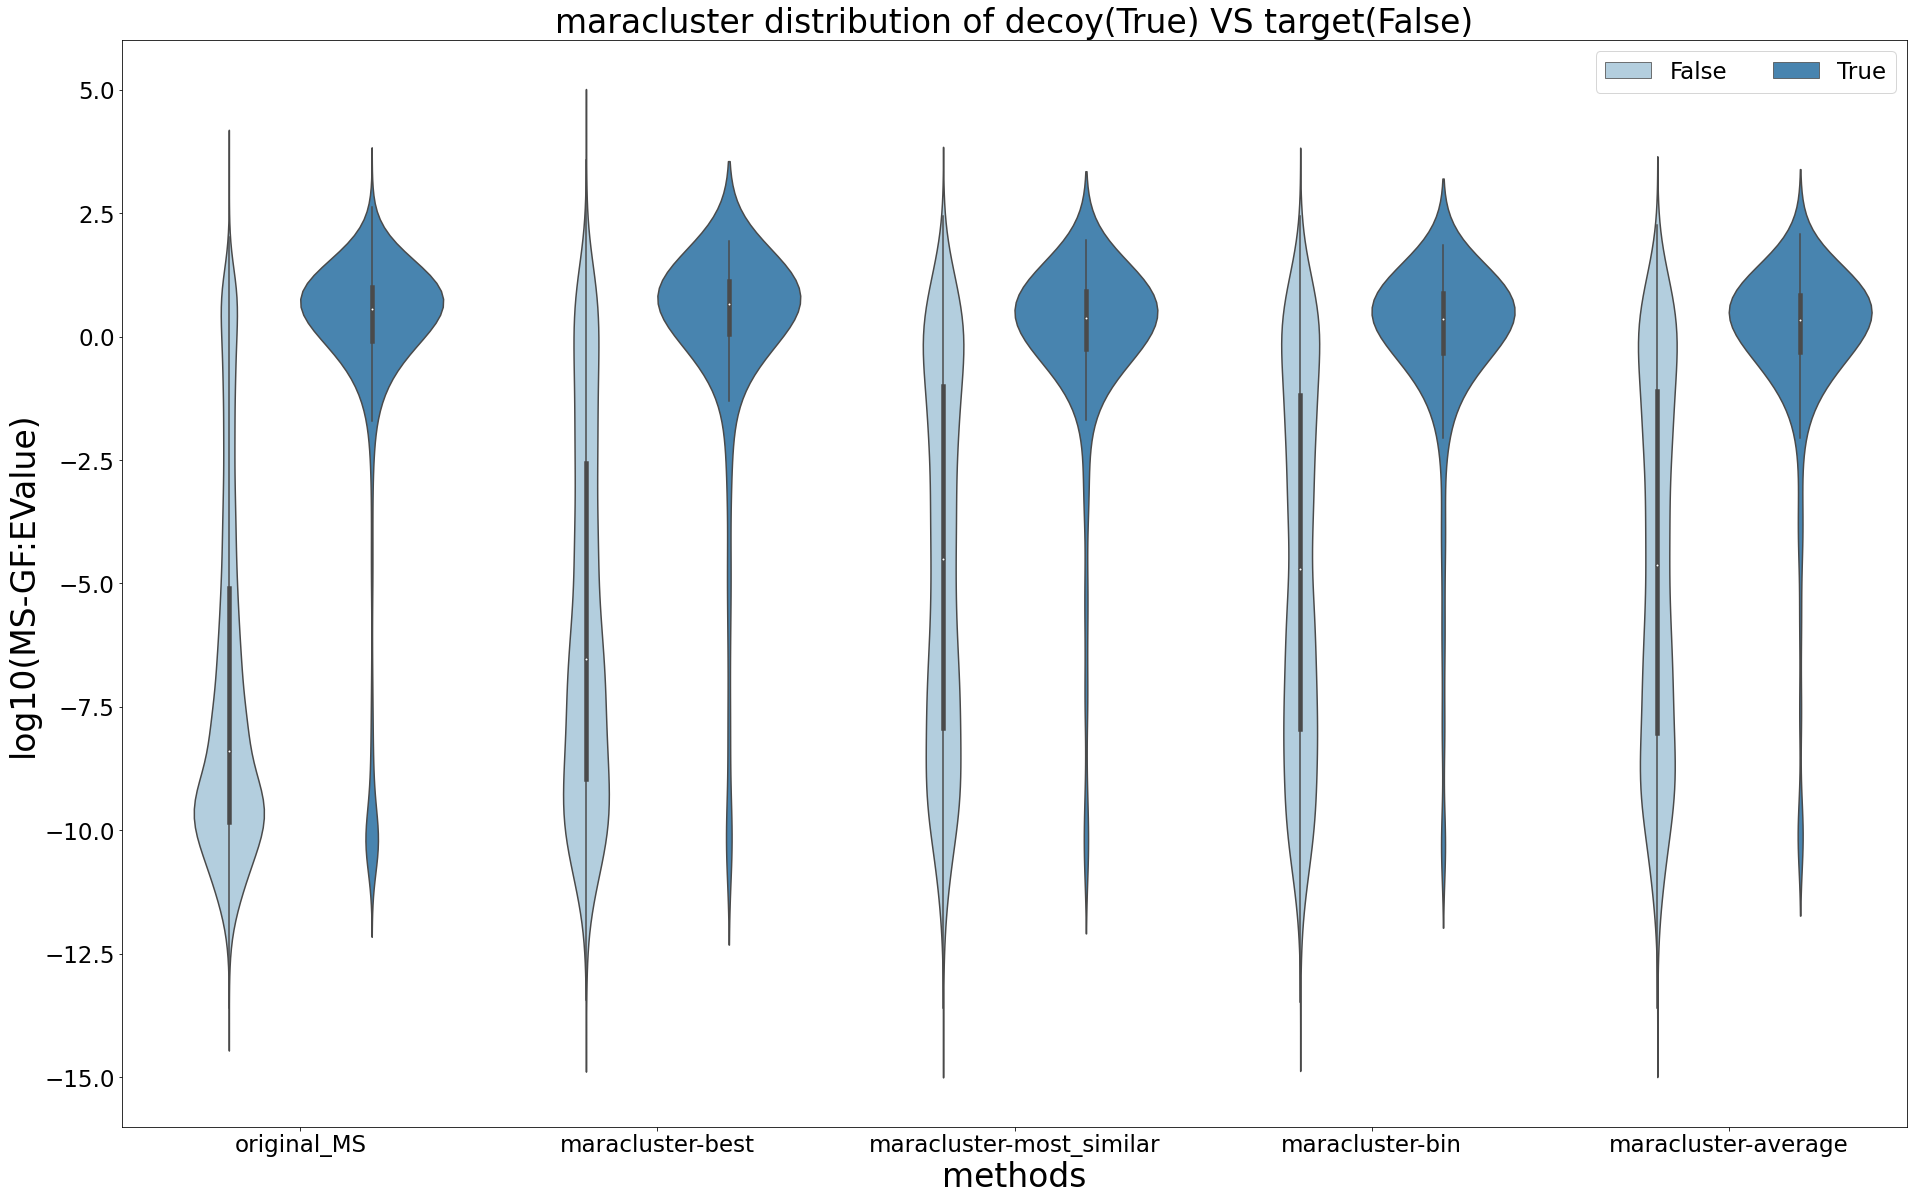

In [12]:
#maracluster 
dataframeListM= dataframeLists
mzid_dfrM = pd.concat(dataframeListM,axis=0,ignore_index=True)
mzid_dfrM['MS-GF:EValue'] = mzid_dfrM['MS-GF:EValue'].apply(lambda x:np.log10(x),[y for y in mzid_dfr['MS-GF:EValue']])

mzid_dfrM = mzid_dfrM[(mzid_dfrM['methods'] =='original_MS')|(mzid_dfrM['methods'] =='maracluster-best')|(mzid_dfrM['methods'] =='maracluster-most_similar')|(mzid_dfrM['methods'] =='maracluster-bin')|(mzid_dfrM['methods'] =='maracluster-average')]
# 绘制分组小提琴 Draw a grouped violin chart
plt.figure(figsize=(32, 20))
plt.subplot(1, 1, 1)
font1 = {
'weight' : 'normal',
'size'   : 33,
}
#sns.set(style="whitegrid")
#sns.set_style({"xtick.major.size": 20, "ytick.major.size": 20})
#sns.set(style='darkgrid',font_scale=1.5)
sns.violinplot(x ="methods" , # 指定x轴的数据 Specify the data of the x-axis
               y ='MS-GF:EValue' , # 指定y轴的数据 Specify the y-axis data
               hue = "isDecoy", # 指定分组变量 Specify grouping variables
               data = mzid_dfrM, # 指定绘图的数据集 Specify the data set for plotting
               scale = 'area',
               split = False,# 将小提琴图从中间割裂开，形成不同的密度曲线；Split the violin chart from the middle to form different density curves;
               palette = 'Blues'  
               #palette = 'Paired_r'
              )
# 添加图形标题 Add graphic title
plt.title('maracluster distribution of decoy(True) VS target(False)',font1)
plt.tick_params(labelsize=23)
# 设置图例 Set legend
plt.legend(loc = 'upper right', ncol = 2,fontsize=23)
plt.xlabel('methods',font1)
plt.ylabel('log10(MS-GF:EValue)',font1)
#控制横纵坐标的值域
#plt.axis([-1,4,-100,300])
# 显示图形
#plt.show()
plt.savefig(" MARACluster distribution of decoy(True) VS target(False)-test.png", dpi=300)

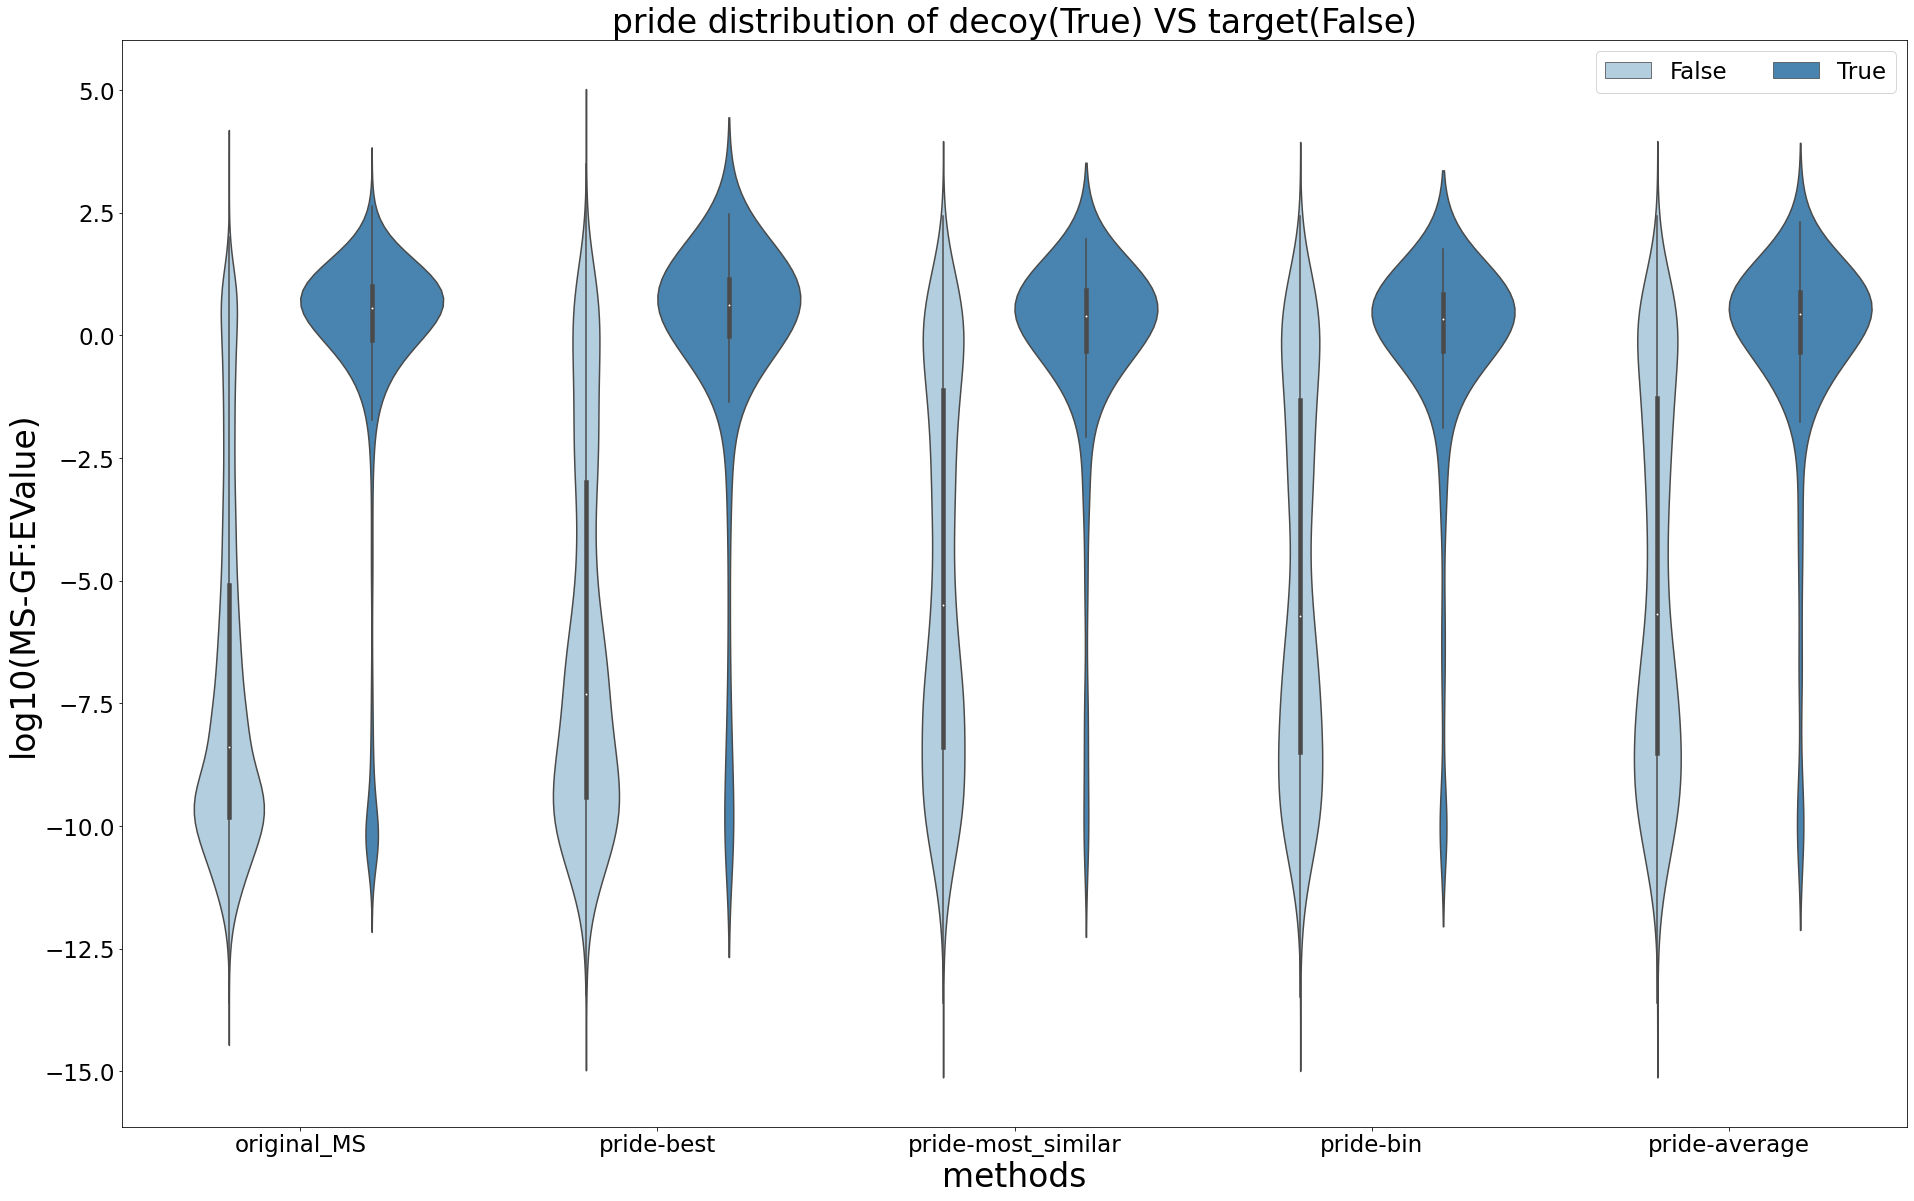

In [13]:
#PRIDE
dataframeListS= dataframeLists
mzid_dfrS = pd.concat(dataframeListS,axis=0,ignore_index=True)
mzid_dfrS['MS-GF:EValue'] = mzid_dfrS['MS-GF:EValue'].apply(lambda x:np.log10(x),[y for y in mzid_dfr['MS-GF:EValue']])
mzid_dfrS = mzid_dfrS[(mzid_dfrS['methods'] =='original_MS')|(mzid_dfrS['methods'] =='pride-best')|(mzid_dfrS['methods'] =='pride-most_similar')|(mzid_dfrS['methods'] =='pride-bin')|(mzid_dfrS['methods'] =='pride-average')]
# 绘制分组小提琴图 Draw a grouped violin chart
plt.figure(figsize=(32, 20))
plt.subplot(1, 1, 1)
font1 = {
'weight' : 'normal',
'size'   : 33,
}
#sns.set(style="whitegrid")
#sns.set_style({"xtick.major.size": 20, "ytick.major.size": 20})
#sns.set(style='darkgrid',font_scale=1.5)
sns.violinplot(x ="methods" , # 指定x轴的数据 Specify the data of the x-axis
               y ='MS-GF:EValue' , # 指定y轴的数据 Specify the y-axis data
               hue = "isDecoy", # 指定分组变量 Specify grouping variables
               data = mzid_dfrS, # 指定绘图的数据集  Specify the data set for plotting
               scale = 'area',  
               split = False,# 将小提琴图从中间割裂开，形成不同的密度曲线；Split the violin chart from the middle to form different density curves;
               palette = 'Blues'  
               #palette = 'Paired_r'
              )
# 添加图形标题 Add graphic title
plt.title('pride distribution of decoy(True) VS target(False)',font1)
plt.tick_params(labelsize=23)
# 设置图例 Set legend
plt.legend(loc = 'upper right', ncol = 2,fontsize=23)
plt.xlabel('methods',font1)
plt.ylabel('log10(MS-GF:EValue)',font1)
#控制横纵坐标的值域
#plt.axis([-1,4,-100,300])
# 显示图形
#plt.show()
plt.savefig(" PRIDE distribution of decoy(True) VS target(False)-test.png", dpi=300)